# Data Modeling 

In [2]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data.csv')
df_w_genres = pd.read_csv('~/Box/DSCI303/archive/data_w_genres.csv')
dfa = pd.read_csv('~/Box/DSCI303/archive/data_by_artist.csv')
dfy = pd.read_csv('~/Box/DSCI303/archive/data_by_year.csv')
dfg = pd.read_csv('~/Box/DSCI303/archive/data_by_genres.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 25 columns):
Unnamed: 0                169909 non-null int64
acousticness              169909 non-null float64
artists                   169909 non-null object
danceability              169909 non-null float64
duration_ms               169909 non-null int64
energy                    169909 non-null float64
explicit                  169909 non-null int64
id                        169909 non-null object
instrumentalness          169909 non-null float64
key                       169909 non-null int64
liveness                  169909 non-null float64
loudness                  169909 non-null float64
mode                      169909 non-null int64
name                      169909 non-null object
popularity                169909 non-null int64
release_date              169909 non-null object
speechiness               169909 non-null float64
tempo                     169909 non-null float64
valen

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,release_date,speechiness,tempo,valence,year,year_bins,popularity_cut,popularity_cut_labels,popularity_qcut,popularity_qcut_labels
0,0,1.332319,['Carl Woitschach'],0.968662,158648,-1.097999,0,6KbQ3uYMLKb5jDxLF7wYDD,1.296562,10,...,1928,-0.289840,0.049500,0.940924,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
1,1,1.329664,"['Robert Schumann', 'Vladimir Horowitz']",-0.907636,282133,-1.776785,0,6KuQTIu1KoTTkLXKrwlLPV,2.389253,8,...,1928,-0.319186,-1.073199,-1.735454,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
2,2,0.294154,['Seweryn Goszczyński'],1.202486,104300,-1.004503,0,6L63VW0PibdM1HDSBoqnoM,-0.523513,5,...,1928,5.568626,-0.317996,1.325822,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
3,3,1.332319,['Francisco Canaro'],1.384983,180760,-1.341091,0,6M94FkXd15sOAOQYRnWPN8,2.343994,1,...,1928-09-25,-0.009722,-0.291114,0.716082,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
4,4,1.319044,"['Frédéric Chopin', 'Vladimir Horowitz']",-1.871449,687733,-1.064341,0,6N6tiFZ9vLTSOIxkj8qKrd,2.411883,11,...,1928,-0.344530,-1.783425,-1.763655,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"


## Clustering 
We are clustering on all numeric features except popularity and year.

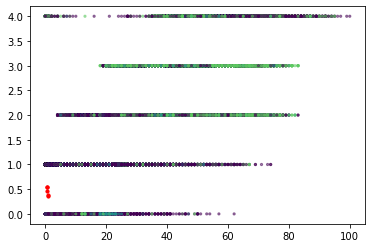

In [28]:
# K-means 
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
        'liveness', 'loudness_norm','mode','speechiness','tempo_norm','valence']
df_kmeans = df[features]
n_samples = df_kmeans.shape[0]
n_features = len(features)

labels = df['year_bins']

kmeans = KMeans(n_clusters=5).fit(df_kmeans)
centroids = kmeans.cluster_centers_
# print(centroids)

# TODO: show results
plt.scatter(df['popularity'], df['year_bins'], c= kmeans.labels_.astype(float), s=5, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10)
plt.show()

#Evalute the results by comparing to labels. 


In [ ]:
#t-SNE


In [4]:
#random forest
from sklearn.ensemble import RandomForestClassifier

df_training = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_train.csv')
df1 = df_training.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut'], axis = 1)
df1.head(5)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,-1.079092,-0.958964,316693,1.411452,0,-0.523513,6,-0.394185,1.321973,0,-0.371208,1.469008,-0.400505
1,-1.308627,-1.369582,168560,1.796658,0,-0.523431,11,4.430585,0.892274,0,0.366436,-1.272015,-0.812079
2,-0.890045,-1.261224,240120,0.308191,0,-0.523503,9,-0.689441,0.653159,1,-0.438569,1.499926,-1.136004
3,0.421601,0.404062,144933,-0.361246,0,-0.523480,8,-0.473372,-0.116065,1,-0.422562,-0.176524,1.634503
4,1.303113,0.147425,169133,-1.288733,0,-0.496325,1,0.080939,-0.828996,1,-0.038401,1.920470,0.937113


In [5]:
training_x = df1
training_y = df_training['popularity_cut']

df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test.csv')
test_x = df_test.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut'], axis = 1)
test_y = df_test['popularity_cut']

training = RandomForestClassifier(oob_score = True)
training.fit(training_x, training_y)
print(training.score(test_x, test_y))

C:\Users\k3kdo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6509328468012477


C:\Users\k3kdo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\k3kdo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [7]:
results = training.predict(test_x)
comparison = test_y.to_frame()
comparison['testing_results'] = results
comparison['validation'] = comparison.apply(lambda x: 1 if x.popularity_cut != x.testing_results else 0, axis=1)

wrong = sum(comparison.validation)
print("Percent accurate: ", 1-wrong/len(comparison))
comparison

Percent accurate:  0.6509328468012477


,popularity_cut,testing_results,validation
0,0,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,1,1,0
6,1,1,0
7,1,1,0
8,1,1,0
9,0,0,0


In [9]:
#Multivariate regression
from sklearn import linear_model

#training
regr = linear_model.LinearRegression()
new_training_y = df_training['popularity']
regr.fit(training_x, new_training_y)

#test results
results1 = regr.predict(test_x)

#cleaning it up
new_test_y = df_test['popularity']
comparison1 = new_test_y.to_frame()
comparison1['Regression_results'] = results1

#comparison
comparison1['Difference'] = abs(comparison1['popularity'] - comparison1['Regression_results'])
print("Average Difference of Prediction and Actual: ", comparison1['Difference'].mean())
comparison1

Average Difference of Prediction and Actual:  12.748378167126441


,popularity,Regression_results,Difference
0,0,38.610076,38.610076
1,24,23.166916,0.833084
2,0,8.348350,8.348350
3,0,10.070062,10.070062
4,16,20.334612,4.334612
5,45,25.047093,19.952907
6,27,41.325891,14.325891
7,28,36.878442,8.878442
8,31,47.151976,16.151976
9,0,21.785648,21.785648
